# Uncertainty propagation

We show how to conduct uncertainty propagation for the **EOQ** model. We can simply import the core function from `temfpy`.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import chaospy as cp

from temfpy.uncertainty_quantification import eoq_model

We specify a uniform distribution centered around $\mathbf{x^0}=(M, C, S) = (1230, 0.0135, 2.15)$ and spread the support 10% above and below the center. We draw $1,000$ random samples from the joint distribution of the input parameters.

In [2]:
x = list()
for center in [1230, 0.0135, 2.15]:
    lower, upper = 0.9 * center, 1.1 * center
    x.append(cp.Uniform(lower, upper).sample(1000, rule="random"))

We are now ready to compute the optimal economic order quantity for each draw.

In [3]:
y = eoq_model(x)

This results in the following distribution $f_{Y}$.

[]

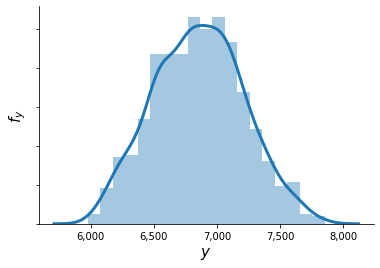

In [4]:
fig, ax = plt.subplots()

sns.distplot(y, ax=ax)

ax.set_xlabel(r"$y$")
ax.set_ylabel(r"$f_y$")

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.axes.get_yaxis().set_ticklabels([])

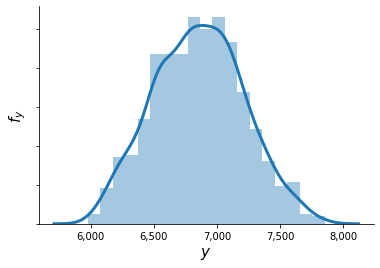

In [5]:
fig